# Analyzing NYC High School Data


### <a id='Index'></a> Index
 * [Intro](#Intro)
 * [Import libraries and read data](#Import-libraries-and-read-data)
 * [Cleaning data](#Cleaning-data)
  * <a href="#Exploring-the-SAT-Data">Exploring the SAT Data</a>
  * [Exploring the Remaining Data](#Exploring-the-Remaining-Data)
  * [Inserting DBN Fields](#Inserting-DBN-Fields)
  * [Combining the SAT Scores](#Combining-the-SAT-Scores)
  * [Parsing Geographic Coordinates for Schools](#Parsing-Geographic-Coordinates-for-Schools)
 * [Combining data](#Combining-data)
  * [Condensing the Class Size Data Set](#Condensing-the-Class-Size-Data-Set)
  * [Computing Average Class Sizes](#Computing-Average-Class-Sizes)
  * [Condensing the Demographics Data Set](#Condensing-the-Demographics-Data-Set)
  * [Condensing the Graduation Data Set](#Condensing-the-Graduation-Data-Set)
  * [Converting AP Test Scores](#Converting-AP-Test-Scores)
  * [Left, Right, Inner, and Outer Joins](#Left,-Right,-Inner,-and-Outer-Joins)
  * [Performing the Left Joins](#Performing-the-Left-Joins)
  * [Performing the Inner Joins](#Performing-the-Inner-Joins)
  * [Filling in Missing Values](#Filling-in-Missing-Values)
 * [Analyzing and Visualizing the Data](#Analyzing-and-Visualizing-the-Data)
  * [Finding Correlations With the r Value](#Finding-Correlations-With-the-r-Value)
  * [Plotting Enrollment](#Plotting-Enrollment)
  * [Exploring Schools With Low SAT Scores and Enrollment](#Exploring-Schools-With-Low-SAT-Scores-and-Enrollment)
  * [Plotting Language Learning Percentage](#Plotting-Language-Learning-Percentage)
  * [Mapping the Schools With Basemap](#Mapping-the-Schools-With-Basemap)
  * [Plotting Out Statistics](#Plotting-Out-Statistics)
  * [Calculating District-Level Statistics](#Calculating-District-Level-Statistics)
 * [In depth analysis](#In-depth-analysis)
  * [Exploring Safety and SAT Scores](#Exploring-Safety-and-SAT-Scores)
  * [Exploring Race and SAT Scores](#Exploring-Race-and-SAT-Scores)
  * [Exploring Gender and SAT Scores](#Exploring-Gender-and-SAT-Scores)
  * [AP Exam Scores vs SAT Scores](#AP-Exam-Scores-vs-SAT-Scores)

---

## Intro
[Back](#Index)

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between [SAT](https://en.wikipedia.org/wiki/SAT) scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2).

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

* [SAT scores by school](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
* [School attendance](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) - Attendance information for each school in New York City
* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
* [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information
* [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) - Demographic information for each school
* [School survey](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research will also give us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

* [New York City](https://en.wikipedia.org/wiki/New_York_City)
* [The SAT](https://en.wikipedia.org/wiki/SAT)
* [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
* [Our data](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

* Only high school students take the SAT, so we'll want to focus on high schools.
* New York City is made up of five boroughs, which are essentially distinct regions.
* New York City schools fall within several different school districts, each of which can contains dozens of schools.
* Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
* Each school in New York City has a unique code called a DBN, or district borough number.
* Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

---

We've placed all the data into the schools folder. Here are all of the files in the folder:

* `ap_2010.csv` - Data on [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e)
* `class_size.csv` - Data on [class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)
* `demographics.csv` - Data on [demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j)
* `graduation.csv` - Data on [graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a)
* `hs_directory.csv` - A directory of [high schools](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2)
* `sat_results.csv` - Data on [SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)
* `survey_all.txt` - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) from all schools
* `survey_d75.txt` - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) from New York City [district 75](http://schools.nyc.gov/academics/specialEducation/D75/default.htm)

We'll read each file into a pandas dataframe, and then store all of the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on.

---

## Import libraries and read data
[Back](#Index)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

for file in data_files:
    key = file.replace('.csv', '')
    data[key] = pd.read_csv('schools/' + file)
    # delete leading and trailing whitespaces (including newlines) from column's names
    data[key].rename(str.strip, axis='columns', inplace=True)
    
# non csv

all_survey = pd.read_csv('schools/survey_all.txt', encoding='windows-1252', delimiter='\t')
d75_survey = pd.read_csv('schools/survey_d75.txt', encoding='windows-1252', delimiter='\t')

survey = pd.concat([all_survey, d75_survey], axis=0, sort=False)

survey['DBN'] = survey['dbn']

# meaningfull columns
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey[survey_fields]

data['survey'] = survey

---

## Cleaning data
[Back](#Index)

### <a id='Exploring-the-SAT-Data'></a> Exploring the SAT Data
[Back](#Index)

What we're mainly interested in is the SAT data set, which corresponds to the dictionary key `sat_results`. This data set contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this data set with information in the other data sets.

Let's explore `sat_results` to see what we can discover. Exploring the dataframe will help us understand the structure of the data, and make it easier for us to analyze it.

In [3]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We can make a few observations based on this output:

* The `DBN` appears to be a unique ID for each school.
* We can tell from the first few rows of names that we only have data about high schools.
* There's only a single row for each high school, so each `DBN` is unique in the SAT data.
* We may eventually want to combine the three columns that contain SAT scores -- `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, and `SAT Writing Avg. Score` -- into a single column to make the scores easier to analyze.

### Exploring the Remaining Data
[Back](#Index)

In [4]:
print('***************')
print('*** ap_2010 ***')
print('***************')
data['ap_2010'].head()

***************
*** ap_2010 ***
***************


,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [5]:
print('******************')
print('*** class_size ***')
print('******************')

data['class_size'].head()

******************
*** class_size ***
******************


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [6]:
print('********************')
print('*** demographics ***')
print('********************')

data['demographics'].head()

********************
*** demographics ***
********************


,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [7]:
print('********************')
print('*** hs_directory ***')
print('********************')

data['hs_directory'].head()

********************
*** hs_directory ***
********************


,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106..."
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Districts 28 and 29 students or residents,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40..."


In [8]:
print('**************')
print('*** survey ***')
print('**************')

data['survey'].head()

**************
*** survey ***
**************


,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


We can make some observations based on the first few rows of each one.

* Each data set appears to either have a DBN column, or the information we need to create one. That means we can use a `DBN` column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical `DBN`s, then group all of their columns together in a single data set.
* Some fields look interesting for mapping -- particularly `Location 1`, which contains coordinates inside a larger string.
* Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate `DBN` values). That means we’ll have to do some preprocessing to ensure that each `DBN` is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

###  Inserting DBN Fields
[Back](#Index)

When we explored all of the data sets, we noticed that some of them, like class_size and hs_directory, don't have a `DBN` column. `hs_directory` does have a dbn column, though, so we can just rename it.

From looking at `class_size` rows, we can tell that the DBN in the `sat_results` data is just a combination of the `CSD` and `SCHOOL CODE` columns in the class_size data. The main difference is that the `DBN` is padded, so that the `CSD` portion of it always consists of two digits. That means we'll need to add a leading 0 to the `CSD` if the `CSD` is less than two digits long.

In [9]:
data['hs_directory']['DBN'] = data['hs_directory']['dbn']
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(lambda x: str(x).zfill(2))
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


### <a name="Combining-the-SAT-Scores"></a> Combining the SAT Scores
[Back](#Index)

Now we're almost ready to combine our data sets. Before we do, let's take some time to calculate variables that will be useful in our analysis. We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam. This will make it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the `SAT Math Avg. Score`, `SAT Critical Reading Avg. Score`, and `SAT Writing Avg. Score` columns in the `sat_results` data set from the object (string) data type to a numeric data type.

In [10]:
sat_results = data['sat_results']
sat_results['SAT Math Avg. Score'] = pd.to_numeric(sat_results['SAT Math Avg. Score'], errors="coerce")
sat_results['SAT Critical Reading Avg. Score'] = pd.to_numeric(sat_results['SAT Critical Reading Avg. Score'], errors="coerce")
sat_results['SAT Writing Avg. Score'] = pd.to_numeric(sat_results['SAT Writing Avg. Score'], errors="coerce")

sat_results['sat_score'] = sat_results['SAT Math Avg. Score'] + sat_results['SAT Critical Reading Avg. Score'] + sat_results['SAT Writing Avg. Score']

sat_results['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

### <a id="Parsing-Geographic-Coordinates-for-Schools"></a> Parsing Geographic Coordinates for Schools
[Back](#Index)

Next, we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field `Location 1` in the `hs_directory` data set.

In [11]:
import re

def extract_lat(x):
    results = re.search('\((\-?\d+\.\d+)\,\s(\-?\d+\.\d+)', x)
    if results:
        groups = results.groups()
        lat = pd.to_numeric(groups[0], errors="coerce")
        lon = pd.to_numeric(groups[1], errors="coerce")
        return pd.Series([lat, lon])
    return null

hs_directory = data['hs_directory']

hs_directory[['lat', 'lon']] = hs_directory['Location 1'].apply(extract_lat)

hs_directory.head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327,40.842414,-73.916162
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280,40.710679,-74.000807
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680,40.718810,-73.806500


---

## <a name='Combining-data'></a> Combining data
[Back](#Index)

Now we're going to clean the data a bit more, then combine it. Finally, we'll compute correlations and perform some analysis.

The first thing we'll need to do in preparation for the merge is condense some of the data sets. We noticed that the values in the `DBN` column were unique in the `sat_results` data set. **Other data sets like** `class_size` **had duplicate** `DBN` **values, however**.

**We'll need to condense these data sets so that each value in the** `DBN` **column is unique**. If not, we'll run into issues when it comes time to combine the data sets.

While the main data set we want to analyze, `sat_results`, has unique `DBN` values for every high school in New York City, other data sets aren't as clean. A single row in the `sat_results` data set may match multiple rows in the `class_size` data set, for example. This situation will create problems, because we don't know which of the multiple entries in the `class_size` data set we should combine with the single matching entry in `sat_results`.

The first data set that we'll condense is `class_size`. The first few rows of `class_size` look like this:

In [12]:
data['class_size'].head(10)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015
5,1,M,M015,P.S. 015 Roberto Clemente,02,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
6,1,M,M015,P.S. 015 Roberto Clemente,03,GEN ED,-,-,-,12.0,1.0,12.0,12.0,12.0,ATS,NaN,01,01M015
7,1,M,M015,P.S. 015 Roberto Clemente,03,CTT,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015
8,1,M,M015,P.S. 015 Roberto Clemente,04,GEN ED,-,-,-,26.0,2.0,13.0,12.0,14.0,ATS,NaN,01,01M015
9,1,M,M015,P.S. 015 Roberto Clemente,05,GEN ED,-,-,-,27.0,1.0,27.0,27.0,27.0,ATS,NaN,01,01M015


As you can see, the first few rows all pertain to the same school, which is why the **DBN appears more than once**. It looks like each school has multiple values for `GRADE`, `PROGRAM TYPE`, `CORE SUBJECT (MS CORE and 9-12 ONLY)`, and `CORE COURSE (MS CORE and 9-12 ONLY)`.

If we look at the unique values for GRADE, we get the following:

In [13]:
data['class_size']['GRADE'].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

**Because we're dealing with high schools, we're only concerned with grades** `9` **through** `12`. That means we only want to pick rows where the value in the `GRADE` column is `09-12`

If we look at the unique values for `PROGRAM TYPE`, we get the following:

In [14]:
data['class_size']['PROGRAM TYPE'].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

Each school can have multiple program types. Because `GEN ED` is the largest category by far, let's only select rows where `PROGRAM TYPE` is `GEN ED`

In [15]:
data['class_size']['PROGRAM TYPE'].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

### <a id="Condensing-the-Class-Size-Data-Set"></a> Condensing the Class Size Data Set
[Back](#Index)

In [16]:
data['class_size'] = data['class_size'][
    (data['class_size']['GRADE']=='09-12') & 
    (data['class_size']['PROGRAM TYPE']=='GEN ED')
]
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


### <a id='Computing-Average-Class-Sizes'></a> Computing Average Class Sizes
[Back](#Index)

As we saw when we displayed class_size on the last screen, `DBN` still isn't completely unique. **This is due to the** `CORE COURSE (MS CORE and 9-12 ONLY)` **and** `CORE SUBJECT (MS CORE and 9-12 ONLY)` **columns**.

`CORE COURSE (MS CORE and 9-12 ONLY)` and `CORE SUBJECT (MS CORE and 9-12 ONLY)` seem to pertain to different kinds of classes. For example, here are the unique values for `CORE SUBJECT (MS CORE and 9-12 ONLY)`:

In [17]:
data['class_size']['CORE SUBJECT (MS CORE and 9-12 ONLY)'].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

This column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. **What we can do is take the average across all of the classes a school offers. This will give us unique `DBN` values, while also incorporating as much data as possible into the average**.

In [18]:
data['class_size'] = data['class_size'].groupby('DBN').agg(np.mean)
data['class_size'].reset_index(inplace=True)

In [19]:
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


### <a id='Condensing-the-Demographics-Data-Set'></a> Condensing the Demographics Data Set
[Back](#Index)

Now that we've finished condensing `class_size`, let's condense `demographics`. The first few rows look like this:

In [20]:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In this case, the only column that prevents a given `DBN` from being unique is `schoolyear`. We only want to select rows where `schoolyear` is `20112012`. **This will give us the most recent year of data, and also match our** `SAT` **results data**.

In [21]:
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


### <a id='Condensing-the-Graduation-Data-Set'></a> Condensing the Graduation Data Set
[Back](#Index)

Finally, we'll need to condense the `graduation` data set. Here are the first few rows:

In [22]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


The `Demographic` and `Cohort` columns are what prevent `DBN` from being unique in the graduation data. A `Cohort` appears to refer to the year the data represents, and the `Demographic` appears to refer to a specific demographic group. **In this case, we want to pick data from the most recent** `Cohort` **available, which is 2006. We also want data from the full cohort, so we'll only pick rows where** `Demographic` **is** `Total Cohort`.

In [23]:
data['graduation'] = data['graduation'][
    (data['graduation']['Demographic'] == 'Total Cohort') & 
    (data['graduation']['Cohort'] == '2006')
]
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


### <a id='Converting-AP-Test-Scores'></a> Converting AP Test Scores
[Back](#Index)

We're almost ready to combine all of the data sets. The only remaining thing to do is convert the [Advanced Placement](https://en.wikipedia.org/wiki/Advanced_Placement_exams) (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

**AP exams have a 1 to 5 scale; 3 or higher is a passing score**. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

**It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools**. To determine this, we'll need to convert the AP exam scores in the ap_2010 data set to numeric values first.

There are three columns we'll need to convert:

 - `AP Test Takers`
 - `Total Exams Taken`
 - `Number of Exams with scores 3 4 or 5`

In [24]:
cols = ['AP Test Takers', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data['ap_2010'][col] = pd.to_numeric(data['ap_2010'][col], errors='coerce')
    
data['ap_2010'].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

### <a id='Left,-Right,-Inner,-and-Outer-Joins'></a> Left, Right, Inner, and Outer Joins
[Back](#Index)

Before we merge our data, we'll need to decide on the merge strategy we want to use. 
Each merge strategy has its advantages. Depending on the strategy we choose, we may preserve rows at the expense of having more missing column data, or minimize missing data at the expense of having fewer rows. Choosing a merge strategy is an important decision; it's worth thinking about your data carefully, and what trade-offs you're willing to make.

Because this project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from `sat_results` while minimizing null values.

This means that we may need to use different merge strategies with different data sets. **Some of the data sets have a lot of missing** `DBN` **values. This makes a left join more appropriate, because we don't want to lose too many rows when we merge. If we did an inner join, we would lose the data for many high schools**.

Some data sets have `DBN` values that are almost identical to those in `sat_results`. Those data sets also have information we need to keep. Most of our analysis would be impossible if a significant number of rows was missing from `demographics`, for example. Therefore, **we'll do an inner join to avoid missing data in these columns**.

### <a id='Performing-the-Left-Joins'></a> Performing the Left Joins
[Back](#Index)

Both the `ap_2010` and the graduation data sets have many missing `DBN` values, **so we'll use a** `left join` **when we merge the** `sat_results` **data set with them**. Because we're using a `left join`, our final dataframe will have all of the same DBN values as the original `sat_results` dataframe.

In [25]:
combined = data['sat_results'].merge(data['ap_2010'], how='left', on='DBN')
combined = combined.merge(data['graduation'], how='left', on='DBN')

In [26]:
combined.shape

(479, 33)

In [27]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%


### <a id='Performing-the-Inner-Joins'></a> Performing the Inner Joins
[Back](#Index)

Now that we've performed the `left joins`, we still have to merge `class_size`, `demographics`, `survey`, and `hs_directory` into `combined`. **Because these files contain information that's more valuable to our analysis and also have fewer missing** `DBN` **values, we'll use the inner join type**.

In [28]:
combined = combined.merge(data['class_size'], how='inner', on='DBN')
combined = combined.merge(data['demographics'], how='inner', on='DBN')
combined = combined.merge(data['survey'], how='inner', on='DBN')
combined = combined.merge(data['hs_directory'], how='inner', on='DBN')

In [29]:
combined.shape

(363, 159)

In [30]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


### <a id='Filling-in-Missing-Values'></a> Filling in Missing Values
[Back](#Index)

You may have noticed that we now have many columns with null (`NaN`) values. This is because we chose to do `left joins`, where some columns may not have had data. The data set also had some missing values to begin with. **If we hadn't performed a** `left join`, **all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set**.

There are several ways to handle missing data, and we'll cover them in more detail later on. For now, **we'll just fill in the missing values with the overall mean for the column**.

In [31]:
means = combined.mean()
combined = combined.fillna(means) # Fill in any missing values in combined with the means
combined = combined.fillna(0) # Fill in any remaining missing values in combined with 0

combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


### <a href="Adding-a-School-District-Column-for-Mapping"></a> Adding a School District Column for Mapping
[Back](#Index)

We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the `DBN`. We can apply a function over the DBN column of combined that pulls out the first two letters.

In [32]:
combined['school_dist'] = combined['DBN'].apply(lambda x: x[0:2])

combined['school_dist']

0      01
1      01
2      01
3      01
4      01
       ..
358    32
359    32
360    32
361    32
362    32
Name: school_dist, Length: 363, dtype: object

---

## <a id='Analyzing-and-Visualizing-the-Data'></a> Analyzing and Visualizing the Data
[Back](#Index)

Now we'll discover correlations, create plots, and then make maps. **The first thing we'll do is find any correlations between any of the columns and** `sat_score`. This will help us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and make maps using the columns we've identified.

### <a id='Finding-Correlations-With-the-r-Value'></a> Finding Correlations With the r Value
[Back](#Index)

Correlations tell us how closely related two columns are. We'll be using the [r value](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient), also called [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient), which measures how closely two sequences of numbers are correlated.

An r value falls between -1 and 1. **The value tells us whether two columns are positively correlated, not correlated, or negatively correlated**. The closer to 1 the r value is, the stronger the positive correlation between the two columns. The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to 0, the weaker the correlation.

In general, **r values above .25 or below -.25 are enough to qualify a correlation as interesting**. An r value isn't perfect, and doesn't indicate that there's a correlation -- just the possiblity of one. To really assess whether or not a correlation exists, we need to look at the data using a scatterplot to see its "shape."

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.

In [33]:
correlations = combined.corr()
correlations['sat_score']

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
priority08                              NaN
priority09                              NaN
priority10                              NaN
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 67, dtype: float64

### <a id='Plotting-Enrollment'></a> Plotting Enrollment
[Back](#Index)

Unsurprisingly, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score`, and `sat_score` are **strongly correlated** with `sat_score`.

We can also make some other observations:

* `total_enrollment` has a **strong positive correlation** with `sat_score`. This is surprising because **we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT**.
* Other columns that are proxies for enrollment correlate similarly. These include total_students, `N_s`, `N_p`, `N_t`, `AP Test Takers`, `Total Exams Taken`, and `NUMBER OF SECTIONS`.
* Both the percentage of females (`female_per`) and number of females (`female_num`) at a school correlate positively with SAT score, whereas the percentage of males (`male_per`) and the number of males (`male_num`) correlate negatively. **This could indicate that women do better on the SAT than men**.
* Teacher and student ratings of school safety (`saf_t_11`, and `saf_s_11`) correlate with `sat_score`.
* Student ratings of school academic standards (`aca_s_11`) correlate with sat_score, but this does not hold for ratings from teachers and parents (`aca_p_11` and `aca_t_11`).
* **There is significant racial inequality** in SAT scores (`white_per`, `asian_per`, `black_per`, `hispanic_per`).
* **The percentage of English language learners** at the school (`ell_percent`, `frl_percent`) has a **strong negative correlation with SAT scores**.

Because enrollment seems to have such a strong correlation, let's make a scatterplot of `total_enrollment` vs `sat_score`. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

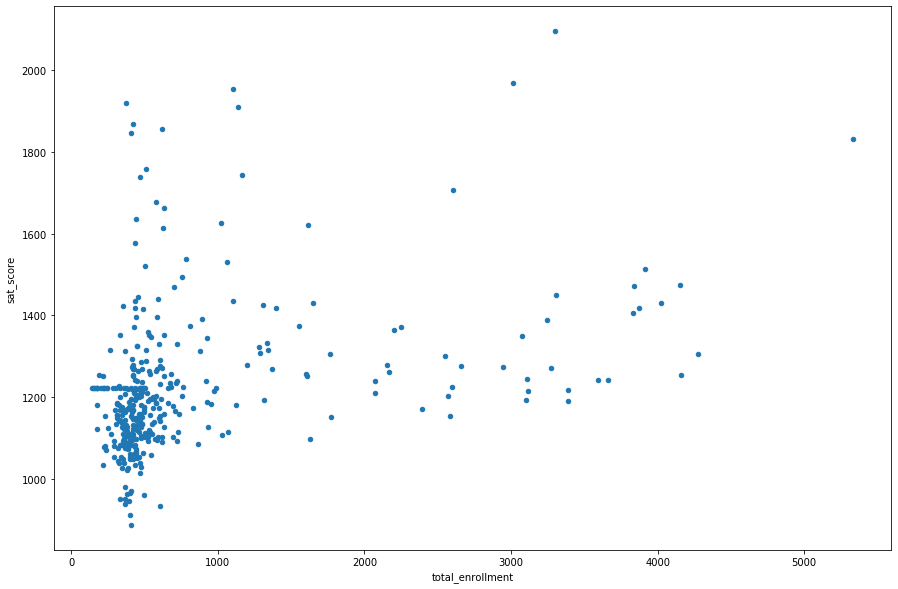

In [34]:
combined.plot.scatter(x='total_enrollment', y='sat_score', figsize=(15,10))

### <a id='Exploring-Schools-With-Low-SAT-Scores-and-Enrollment'></a>  Exploring Schools With Low SAT Scores and Enrollment
[Back](#Index)

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between `sat_score` and `total_enrollment`. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, **there's an interesting cluster of points at the bottom left where** `total_enrollment` **and** `sat_score` **are both low**. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [35]:
low_enrollment = combined[
    (combined['total_enrollment'] < 1000) &
    (combined['sat_score'] < 1000)  
]
low_enrollment['School Name']

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

### <a id='Plotting-Language-Learning-Percentage'></a> Plotting Language Learning Percentage
[Back](#Index)

Our researches revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. **This indicates that it's actually** `ell_percent` **that correlates strongly with** `sat_score`, **rather than** `total_enrollment`. To explore this relationship further, let's plot out `ell_percent` vs `sat_score`.

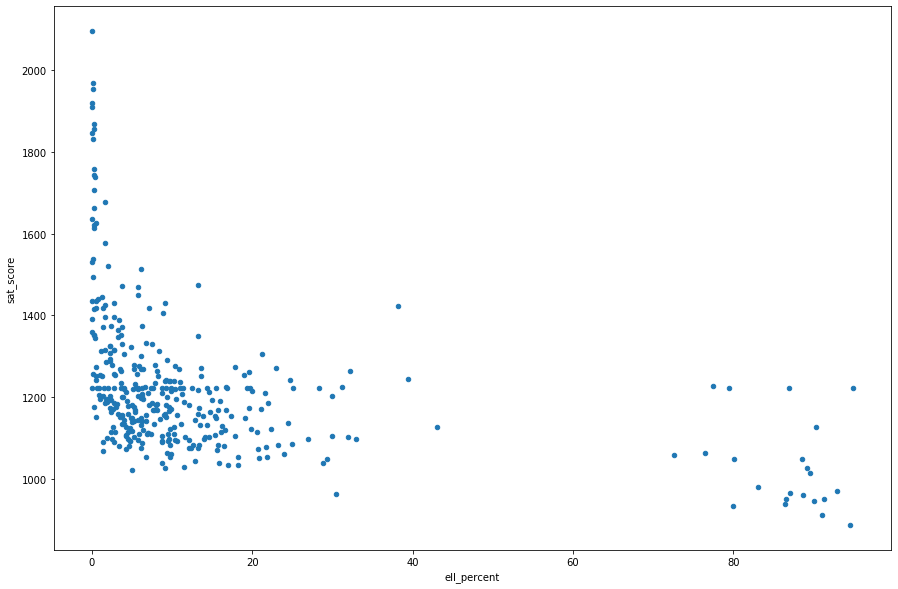

In [36]:
combined.plot.scatter(x='ell_percent', y='sat_score', figsize=(15,10))

### <a id='Mapping-the-Schools-With-Basemap'></a> Mapping the Schools With Basemap
[Back](#Index)

It looks like `ell_percent` correlates with `sat_score` more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high `ell_percent` values and low `sat_score` values. **This cluster represents the same group of international high schools we investigated earlier**.

In order to explore this relationship, we'll want to map out `ell_percent` by school district. The map will show us which areas of the city have a lot of English language learners.

We extracted the coordinates for all of the schools earlier, and stored them in the `lat` and `lon` columns. The coordinates will enable us to plot all of the schools on a map of New York City.

/Users/lucabrognara/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/lucabrognara/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


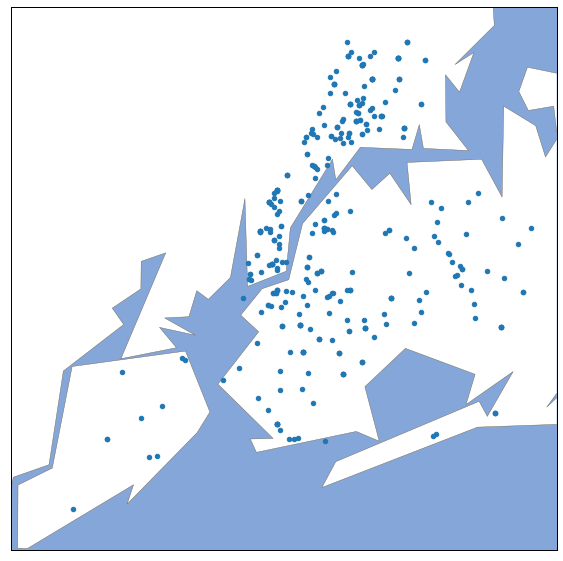

In [37]:
def basemapInstance():
    plt.figure(figsize=(15, 10))
    m = Basemap(
        projection='merc', 
        llcrnrlat=40.496044, 
        urcrnrlat=40.915256, 
        llcrnrlon=-74.255735, 
        urcrnrlon=-73.700272,
        resolution='i'
    )

    m.drawmapboundary(fill_color='#85A6D9')
    m.drawcoastlines(color='#6D5F47', linewidth=.4)
    m.drawrivers(color='#6D5F47', linewidth=.4)
    m.fillcontinents(color='white',lake_color='#85A6D9')
    
    return m


m = basemapInstance()

longitudes = combined['lon'].tolist()
latitudes = combined['lat'].tolist()

m.scatter(x=longitudes, y=latitudes, s=20, zorder=2, latlon=True)

### <a id='Plotting-Out-Statistics'></a> Plotting Out Statistics
[Back](#Index)

From the map on the previous screen, we can see that school density is **highest in Manhattan** (the top of the map), and **lower in Brooklyn, the Bronx, Queens, and Staten Island**.

Now that we've plotted the school locations, we can begin to **display meaningful information on the maps, such as the percentage of English language learners by area**.

/Users/lucabrognara/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/lucabrognara/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


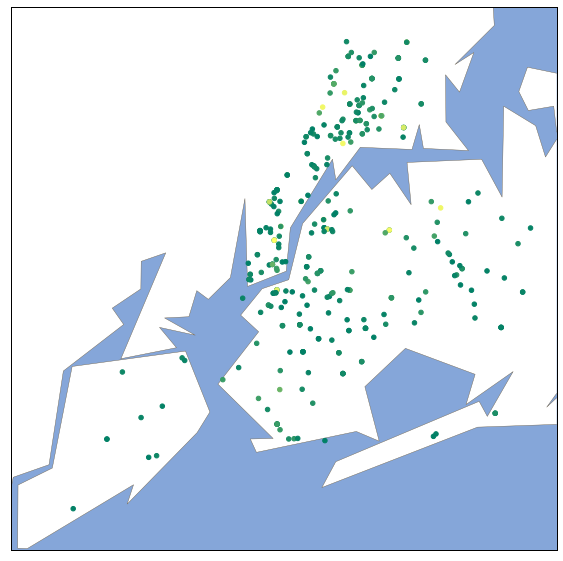

In [38]:
m = basemapInstance()
m.scatter(x=longitudes, y=latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")

### <a id='Calculating-District-Level-Statistics'></a> Calculating District-Level Statistics
[Back](#Index)

Unfortunately, due to the number of schools, it's hard to interpret the map we made on the last screen. It looks like uptown Manhattan and parts of Queens have a higher `ell_percent`, but we can't be sure. One way to make very granular statistics easier to read is to aggregate them. In this case, **we can aggregate by district, which will enable us to plot** `ell_percent` **district-by-district instead of school-by-school**.

/Users/lucabrognara/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/lucabrognara/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


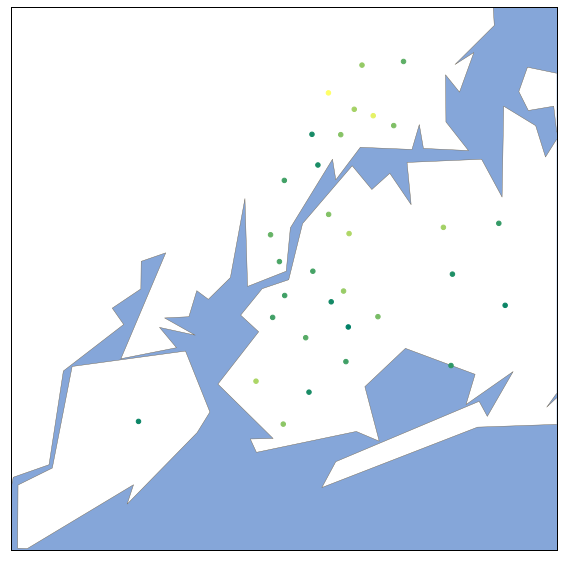

In [39]:
districts = combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace=True)

m = basemapInstance()

longitudes = districts['lon'].tolist()
latitudes = districts['lat'].tolist()
m.scatter(x=longitudes, y=latitudes, s=20, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")

---

## <a id='In-depth-analysis'></a> In depth analysis
[Back](#Index)

We explored relationships between SAT scores and demographic factors in New York City public schools. For a brief bit of background, the [SAT](https://en.wikipedia.org/wiki/SAT), or Scholastic Aptitude Test, **is a test that high school seniors in the U.S. take every year**. The SAT has three sections, each of which is worth a maximum of 800 points. **Colleges use the SAT to determine which students to admit. High average SAT scores are usually indicative of a good school**.

**New York City has a significant immigrant population and is very diverse**, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, **if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair**.

We began performing some analysis, now we'll extend that analysis.

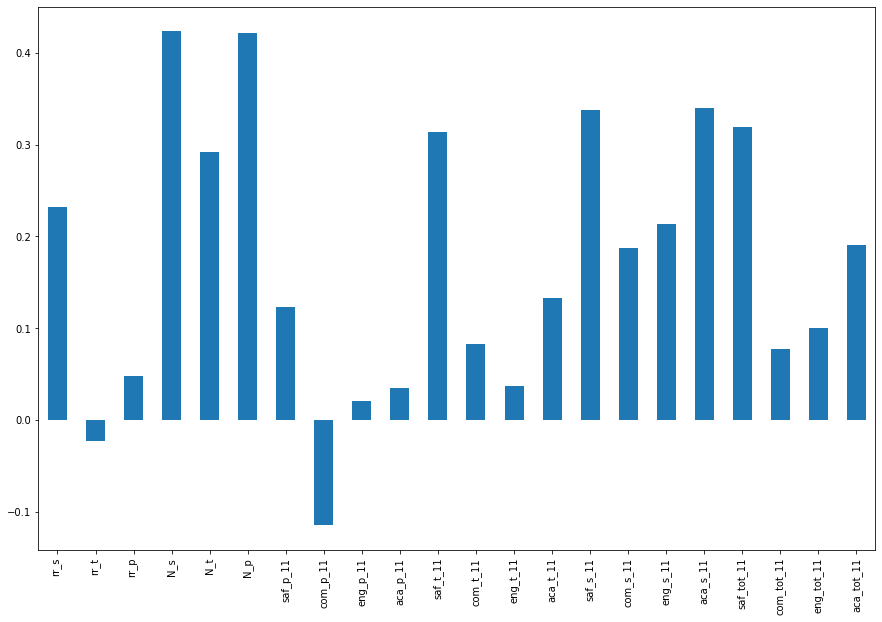

In [40]:
survey_fields.remove("DBN")
combined.corr()["sat_score"][survey_fields].plot.bar(figsize=(15, 10))

These are the columns and their respective meanings:

* `rr_s` Student Response Rate
* `rr_t` Teacher Response Rate
* `rr_p` Parent Response Rate
* `N_s` Number of student respondents
* `N_t` Number of teacher respondents
* `N_p` Number of parent respondents
* `saf_p_10` Safety and Respect score based on parent responses
* `com_p_10` Communication score based on parent responses
* `eng_p_10` Engagement score based on parent responses
* `aca_p_10` Academic expectations score based on parent responses
* `saf_t_10` Safety and Respect score based on teacher responses
* `com_t_10` Communication score based on teacher responses
* `eng_t_10` Engagement score based on teacher responses
* `aca_t_10` Academic expectations score based on teacher responses
* `saf_s_10` Safety and Respect score based on student responses
* `com_s_10` Communication score based on student responses
* `eng_s_10` Engagement score based on student responses
* `aca_s_10` Academic expectations score based on student responses
* `saf_tot_10` Safety and Respect total score
* `com_tot_10` Communication total score
* `eng_tot_10` Engagement total score
* `aca_tot_10` Academic Expectations total score

We can find strong positive correlations between `N_s` (Number of student respondents), `N_p` (Number of parent respondents) and `sat_score`. It makes sense since they're postively correlated to `total_enrollment`.

Next interesting correlation is between `saf_t_10` with `saf_s_10` and `sat_score`, so better SAT score come with better safety, it make sense since better teaching and learning are likely in safe places.

The last interesting correlation is the `aca_s_11`, correlates with `sat_score`, but this is not true for `aca_t_11`, how teachers perceive academic standards, or `aca_p_11`, how parents perceive academic standards.

### <a id='Exploring-Safety-and-SAT-Scores'></a> Exploring Safety and SAT Scores
[Back](#Index)

`saf_t_11` and `saf_s_11` measure how teachers and students perceive safety at school and is correlated highly with `sat_score`. Now we'll dig into this relationship a bit more, and try to figure out which schools have low safety scores.

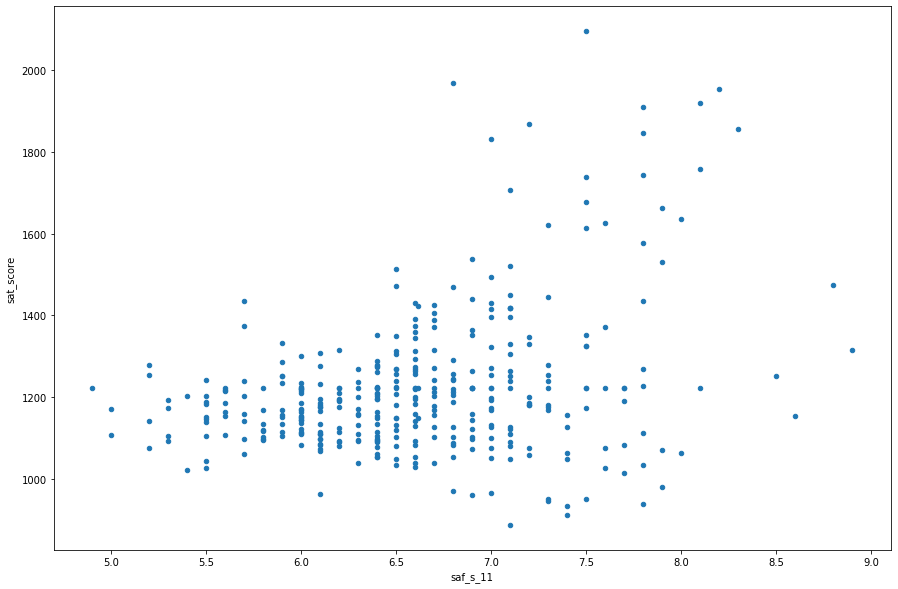

In [41]:
combined.plot.scatter(x='saf_s_11', y='sat_score', figsize=(15, 10))

There appears to be a correlation between SAT scores and safety, although it isn't thatstrong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

/Users/lucabrognara/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/lucabrognara/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


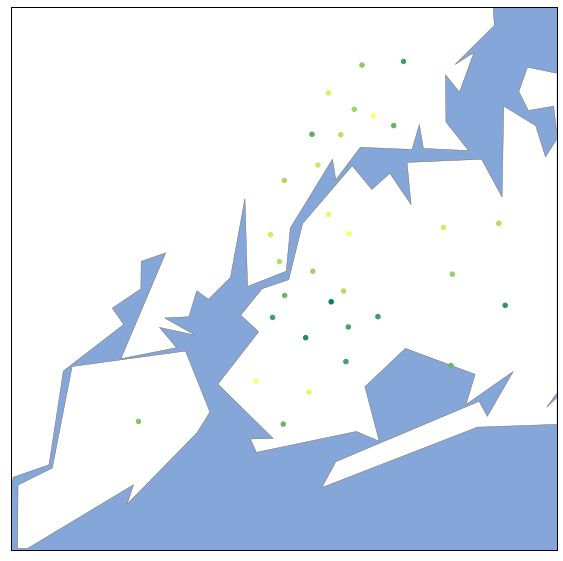

In [42]:
m = basemapInstance()

longitudes = districts['lon'].tolist()
latitudes = districts['lat'].tolist()
m.scatter(x=longitudes, y=latitudes, s=20, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")

It looks like **Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores**.

### <a id='Exploring-Race-and-SAT-Scores'></a> Exploring Race and SAT Scores
[Back](#Index)

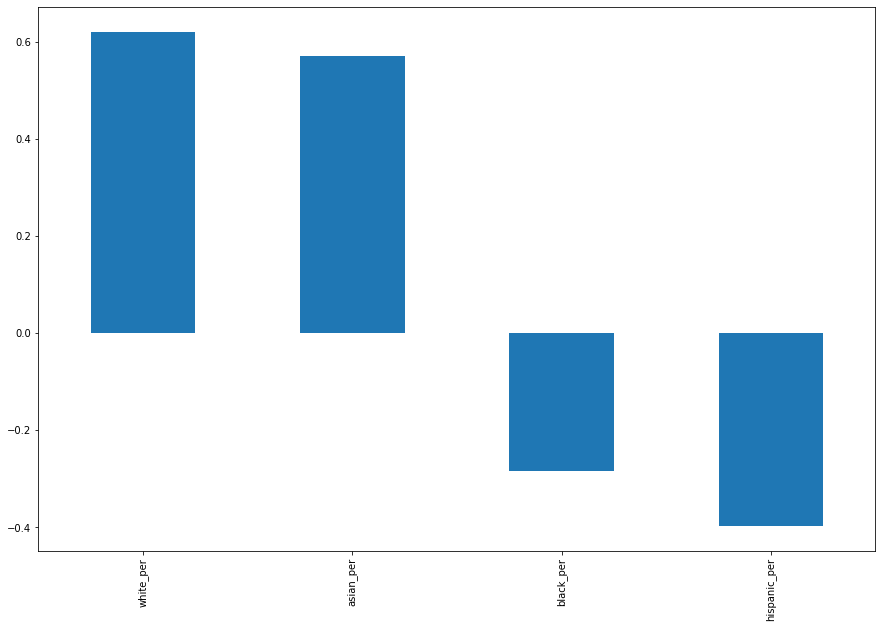

In [45]:
cols = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
combined.corr()['sat_score'][cols].plot.bar(figsize=(15,10))

`sat_score` correlate strongly and positively with `white_per` and `asian_per`, negatively with `black_per` and in a more evident way with `hispanic_per`. 

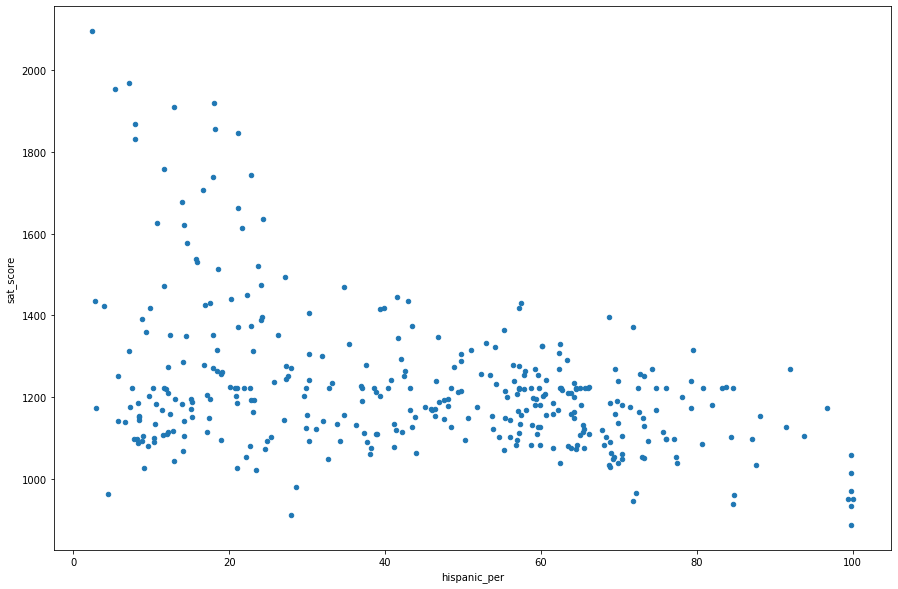

In [48]:
combined.plot.scatter(x='hispanic_per', y='sat_score', figsize=(15,10))

Seem that under a SAT score of 1300 points the hispanic percentage is not relevant, over this limit we can see the negative correlation

In [51]:
combined[combined['hispanic_per'] > 95]['SCHOOL NAME']

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.

In [52]:
combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"]

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low `hispanic_per`, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

### <a id='Exploring-Gender-and-SAT-Scores'></a> Exploring Gender and SAT Scores
[Back](#Index)

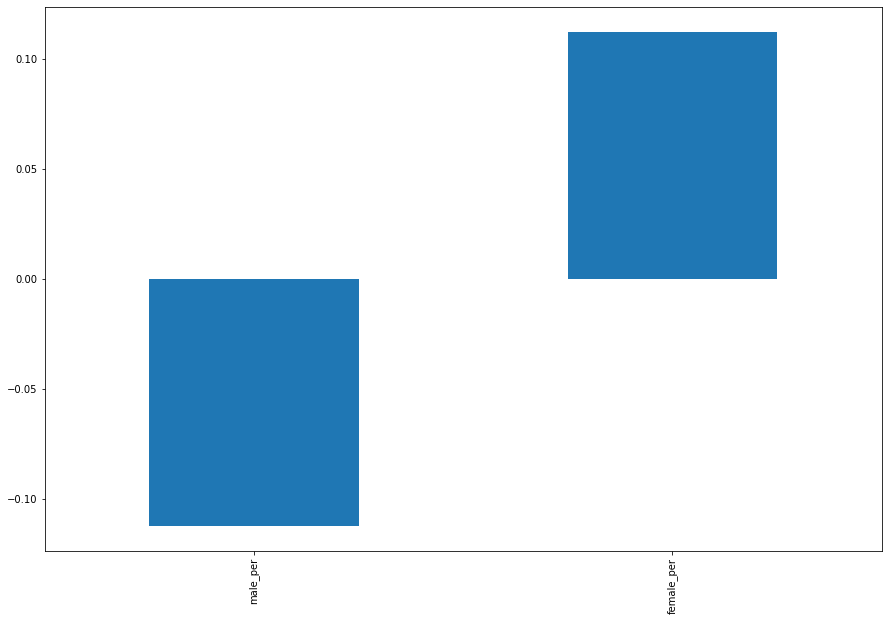

In [54]:
cols = ['male_per', 'female_per']
combined.corr()['sat_score'][cols].plot.bar(figsize=(15, 10))

Weak correlations are present, megative for male positive for female

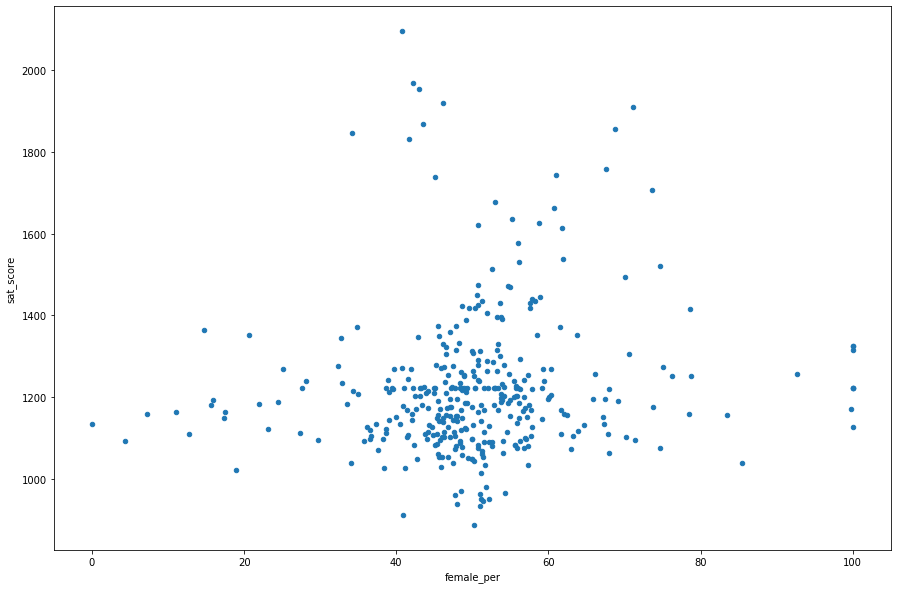

In [56]:
combined.plot.scatter("female_per", "sat_score",figsize=(15, 10))

Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.

In [57]:
combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"]

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

These schools appears to be very selective liberal arts schools that have high academic standards.

### <a id='AP-Exam-Scores-vs-SAT-Scores'></a> AP Exam Scores vs SAT Scores
[Back](#Index)

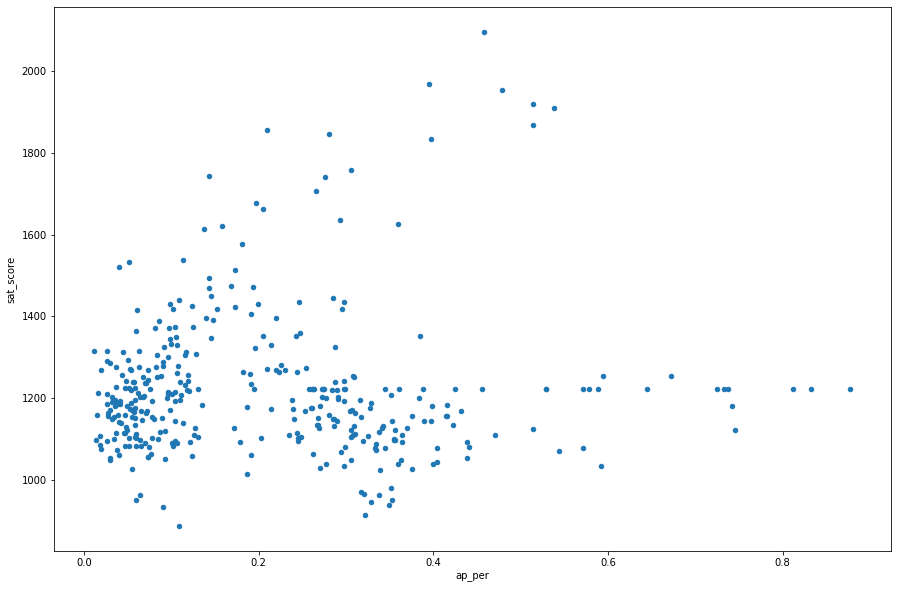

In [60]:
combined["ap_per"] = combined["AP Test Takers"] / combined["total_enrollment"]
combined.plot.scatter(x='ap_per', y='sat_score',figsize=(15, 10))

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.